# Superposition in space, land strip sudden change at both ends

IHE, transient groundwater

Olsthoorn, 2019-01-02

The 1D aquifer has a limited width equal to $L$. The head at $x=0$ changes suddenly at $t=0$ by the value $a$, while the head at $x=L$ remains fixed.

The solution for an infinite aquifer with sudden head change at $x=0$ reads

$$ s(x, t) = s(x, 0) \, \mathtt{erfc} \left(\sqrt{\frac {x^2 S} {4 kD t}} \right) $$

In this case the head change at $x=0$ is at both ends of the strip. At the left it is $a$ and at the right it is $b$.

For convenience and symmetry we choose $x=0$ in the center of the strip. So the left is $x=-L/2$ and the right it is $x=+L/2$.

Compensating sudden head change at the left side requires mirror changes equal to $-a$ at $x = (2 i - \frac 1 2) L$ atarting at $i=1$ and mirror changes equal to $a$ at $x = (2 i + \frac 1 2) L $ starting at $i=0$.

Compensating the sudden head change equal to $b$ at $x = \frac L 2$ requires mirror changes equal to $-b$ at $x = (2 i - \frac 1 2) L$ from $ i = 1$ and mirrors equal to $+b$ at $x = (2 i + \frac 1 2) L$ starting at $i = 0$.

This superposition can, therefore, be written as

$$ s(x, t) = \sum _0 ^\infty \left\{
a \, \mathtt{erfc} \left(((2 i + \frac 1 2) L + x) \sqrt{ \frac S {4 kD t} } \right)
+
b \,\mathtt{erfc} \left(((2 i + \frac 1 2) L - x) \sqrt{\frac S {4 kD t}} \right) 
\right\}
-
\sum_1 ^\infty \left\{
a \, \mathtt{erfc} \left(((2 i - \frac 1 2) L - x) \sqrt{\frac S {4 kD t}} \right)
+
b \mathtt{erfc} \left(((2 i - \frac 1 2) L + x) \sqrt{\frac S {4 kD t}} \right)
\right\} $$

Note that, when $x$ was chosen at $x=L$, the superposition would be symmetrical at $x=0$. The solution could then be written as

$$ s(x, t) = a \sum _1 ^\infty  \mathtt{erfc} \left(((2 i - 1) L + x) \sqrt{\frac S {4 kD t}} \right) 
-
\mathtt{erfc} \left( \left((2 i - 1) L - x \right) \sqrt{\frac S {4 kD t}} \right) $$

But then, $x=0$ would be at the right end of the strip of land instead of on the left end.

Let's implement both expressions. We can do so in two graphs for ease of inspection.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

## Strip with $x=0$ at left, $-L/2 < x < L/2$

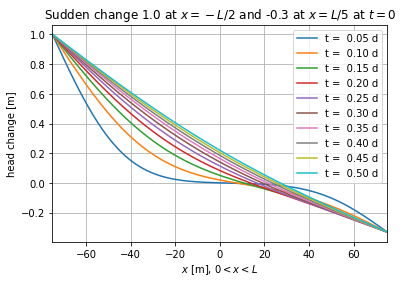

In [17]:
L = 150 # m (strip wirdth)
x = np.linspace(-L/2, L/2, 201) # points, taking left at zero.
kD = 600 # m2/d
S = 0.1 # [-]
a = 1.0 # m, sudden head change at x = -L/2
b = -0.33 # m, sudden head change at x = L/2
times = np.linspace(0, 0.5, 11)[1:] # d

plt.title('Sudden change {:.1f} at $x = -L/2$ and {:.1f} at $x = L/5$ at $t=0$'.format(a, b))
plt.xlabel('$x$ [m], $ 0 < x < L $')
plt.ylabel('head change [m]')
plt.xlim((-L/2, L/2))
plt.grid()
for t in times:
    rt = np.sqrt(S / (4 * kD * t))
    s = np.zeros_like(x)
    for i in range(20):
        s += a * erfc(((2 * i + 0.5) * L + x) * rt)
        s += b * erfc(((2 * i + 0.5) * L - x) * rt)
        if i > 0:
            s -= a * erfc(((2 * i - 0.5) * L - x) * rt)
            s -= b * erfc(((2 * i - 0.5) * L + x) * rt)
    plt.plot(x, s, label='t = {:5.2f} d'.format(t))
plt.legend()
plt.show()
        
